In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

/home/nicolas/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#389594 entries
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [5]:
pev.dropna(subset=['property_type', 'place_with_parent_names'], inplace=True)
pev2 = pev.loc[(pev.property_type != 'apartment')]
pev3 = pev2.loc[(pev.property_type != 'house')]
pev4 = pev3.loc[(pev.property_type != 'PH')]
pev4.tail(10)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
388648,NaN,2015-11-29,ARS,Corredor Responsable: Rosana Gerosa - CI Mat. ...,NaN,"{""address"":""Cafferata Esq. Marcos Paz"",""condit...",NaN,3836277.0,NaN,http://thumbs3.properati.com/7/WDRLazlLwIASCPI...,...,60000.000000,NaN,http://santa-fe.properati.com.ar/vh0i_venta_lo...,store,NaN,NaN,20.0,NaN,NaN,Local Comercial 45m2 cubiertos - Finan. 15 Cuotas
388667,NaN,2015-11-29,NaN,Corredor Responsable: Maria Cristina Barrionue...,NaN,"{""address"":""Niceto Vega al 5600"",""condition"":""...",NaN,3430234.0,NaN,http://thumbs3.properati.com/8/YpP4QjLpQwUy0IH...,...,NaN,NaN,http://palermo.properati.com.ar/vh1c_venta_loc...,store,NaN,NaN,20.0,NaN,NaN,LOCAL APTO GASTRONOMIA Palermo Hollywood
388738,NaN,2015-11-29,USD,LOCAL OPERACION: VENTA TIPO DE PROPIEDAD: LO...,NaN,"{""address"":""LA RIOJA al 2900"",""year"":25,""condi...",NaN,3429228.0,NaN,http://thumbs3.properati.com/2/ea_GNR2jsUuUfgV...,...,1095.238095,1095.238095,http://san-bernardo-buenos-aires-costa-atlanti...,store,NaN,NaN,21.0,NaN,21.0,LOCAL EN VENTA
388766,NaN,2015-11-30,USD,-Oportunidad- DUEÑO VENDE LOCAL en Galería Don...,350,"{""images"":{""https://properati-us-ar.s3-us-west...",NaN,3428983.0,NaN,http://thumbs3.properati.com/6/eVMiw_vkS626xI5...,...,1160.000000,1160.000000,http://san-isidro-bs-as-g-b-a-zona-norte.prope...,store,2.0,NaN,50.0,NaN,50.0,Local venta
388820,NaN,2015-11-30,USD,"Local fiambreria y queseria, seminuevo con mu...",NaN,"{""address"":""VIAMONTE 200"",""original_url"":""http...",NaN,3429617.0,NaN,http://thumbs3.properati.com/2/KF275ytf65QqgV4...,...,2500.000000,NaN,http://ramos-mejia.properati.com.ar/vh9w_venta...,store,NaN,NaN,40.0,NaN,NaN,Fdo de Comerc en Venta Ramos Mejia / La Matanz...
388837,NaN,2015-11-30,USD,Propiedad con dos locales en planta baja garag...,NaN,"{""address"":""VENEZUELA 5500"",""original_url"":""ht...",NaN,3427406.0,NaN,http://thumbs3.properati.com/3/0PsLQ32H5mqcFS6...,...,1350.000000,NaN,http://villa-luzuriaga.properati.com.ar/vhat_v...,store,NaN,NaN,100.0,NaN,NaN,Local a la calle en Venta Villa Luzuriaga / La...
388839,NaN,2015-11-30,USD,Local centrico en dos plantas actualmente co...,NaN,"{""address"":""SANTIAGO DEL ESTERO 300"",""original...",NaN,3431333.0,NaN,http://thumbs3.properati.com/4/NslJ7SaTMC5Qnxu...,...,1500.000000,NaN,http://liniers.properati.com.ar/vhav_venta_loc...,store,NaN,NaN,120.0,NaN,NaN,Local a la calle en Venta Ciudad Autonoma de B...
388863,NaN,2015-11-30,NaN,"Local de 22mts2 a mts estacion de ramos mejia,...",NaN,"{""address"":""GUEMES, GRAL 0"",""original_url"":""ht...",NaN,3429617.0,NaN,http://thumbs3.properati.com/0/iHTcRf5bmDxcjIe...,...,NaN,NaN,http://ramos-mejia.properati.com.ar/vhbo_venta...,store,NaN,NaN,22.0,NaN,NaN,Local a la calle en Venta Ramos Mejia / La Mat...
389149,NaN,2015-11-30,USD,OFICINAS CON DEPOSITO PROXIMO A AV. IRIGOYEN. ...,NaN,"{""address"":""Pola 300"",""original_url"":""http...",NaN,3430544.0,NaN,http://thumbs3.properati.com/3/PwLGq8dDlz0HODF...,...,NaN,NaN,http://moron.properati.com.ar/vhqg_venta_local...,store,NaN,NaN,NaN,NaN,NaN,U$D 110.000 - Galpon en Venta - Pola 300
389308,NaN,2015-11-30,USD,EN VENTA -OFICINAS+GALPON+DEPOSITOS-VILLA CABR...,NaN,"{""address"":""Temistocles Castellanos 1800"",...",NaN,3860259.0,NaN,http://thumbs3.properati.com/2/y9TZt7oyh4duIFw...,...,NaN,NaN,http://cordoba.properati.com.ar/vhwk_venta_loc...,store,NaN,NaN,NaN,NaN,NaN,U$D 240.000 - Galpon en Venta - Temistocles Ca...


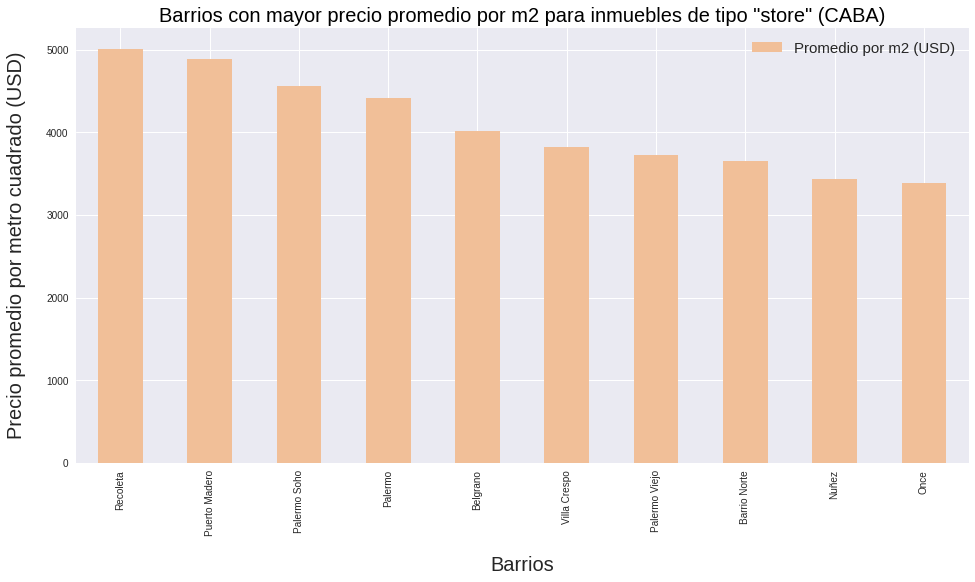

In [62]:
# HAY QUE DEFINIR CÓMO USAR PALERMO: si como un barrio entero o varios

pev.dropna(subset=['property_type', 'place_with_parent_names'], inplace=True)
pev_negocios_capital = pev.loc[(pev.place_with_parent_names.str.contains('Capital Federal') & \
                                (pev.property_type.str.contains('store'))), ['place_name', 'price_usd_per_m2']]
pev_negocios_capital.dropna(inplace = True)
negocios_capital_por_barrio = pev_negocios_capital.groupby('place_name').agg([np.mean, np.size])
negocios_capital_por_barrio.columns=['promedio', 'tamanio']
prom_negocios_capital_por_barrio_ordenado \
    = negocios_capital_por_barrio.loc[(negocios_capital_por_barrio.tamanio > 4),:].sort_values('promedio',\
                                                                                               ascending=False)
f = plt.figure()
ax = prom_negocios_capital_por_barrio_ordenado.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#F1BF98', ax=f.gca())
ax.set_title('Barrios con mayor precio promedio por m2 para inmuebles de tipo "store" (CABA)',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.show()

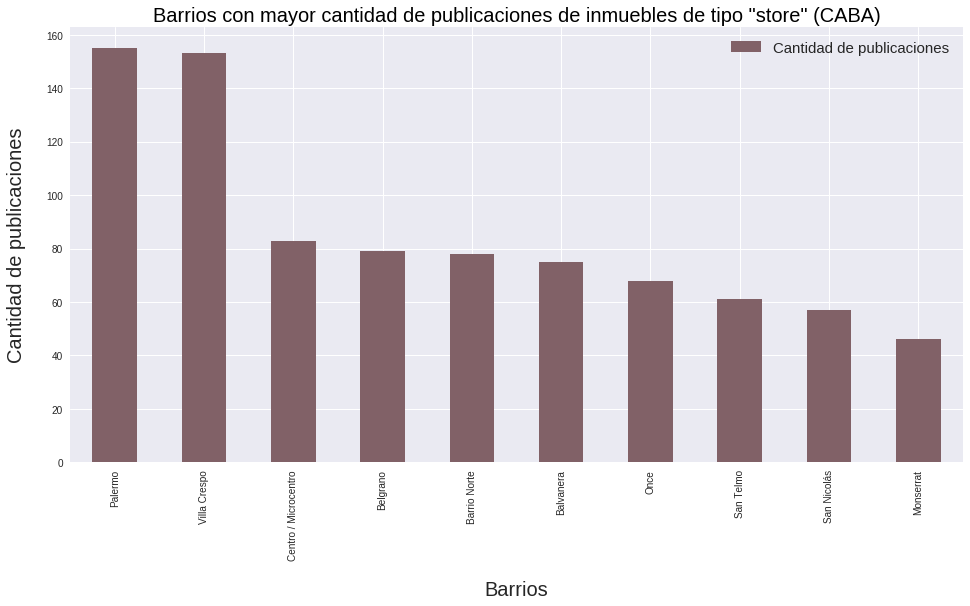

In [68]:
cant_negocios_capital_por_barrio_ordenado = negocios_capital_por_barrio.loc[(negocios_capital_por_barrio.\
                                tamanio > 4),:].sort_values('tamanio', ascending=False)
f = plt.figure()
ax = cant_negocios_capital_por_barrio_ordenado.head(10).plot(y='tamanio', kind='bar', figsize=(16,8),\
                                                     color='#816167', ax=f.gca())
ax.set_title('Barrios con mayor cantidad de publicaciones de inmuebles de tipo "store" (CABA)',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
ax.legend(["Cantidad de publicaciones"], prop={'size': 15.0});
plt.show()




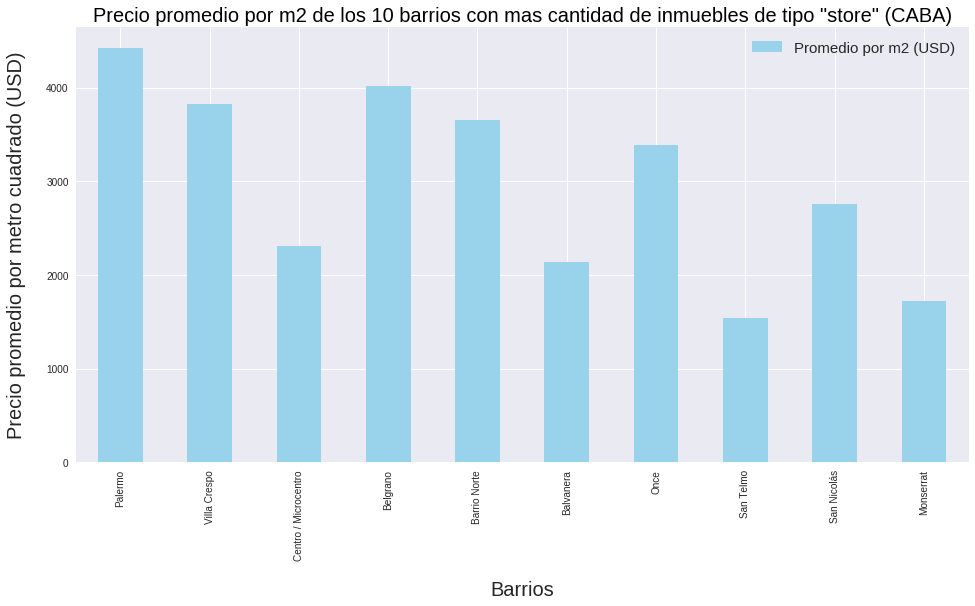

In [70]:
cant_y_promedio_negocios_capital_por_barrio = \
    negocios_capital_por_barrio.loc[(negocios_capital_por_barrio.tamanio > 4),:].sort_values('tamanio',\
                                ascending=False)['promedio']
    
f = plt.figure()
ax = cant_y_promedio_negocios_capital_por_barrio.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#98D2EB', ax=f.gca())
ax.set_title('Precio promedio por m2 de los 10 barrios con mas cantidad de inmuebles de tipo "store" (CABA)',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.show()


## Mismo análisis, para GBA